# INFO 2950 PHASE 5

## Part 1: Introduction

#### Background Information
[Personality traits are associated with drug use and are an influential factor in substance use disorders.](https://fortbehavioral.com/addiction-recovery-blog/personality-traits-related-to-drug-use/#:~:text=Although%20a%20person's%20environment%20is,and%20therefore%20substance%20use%20disorders.) [Specifically, the big 5 personality traits show correlations with drug usage.](https://pubmed.ncbi.nlm.nih.gov/34766786/) [The big 5 personality traits is a scientifically-supported personality model originally created in 1949 by D.W.Fiske involving 5 main traits: Extraversion, Agreeableness, Conscientiousness, Neuroticism, and Openness to Experience.](https://pubmed.ncbi.nlm.nih.gov/1635039/) [These traits are briefly described as: extraversion: how social and talkative someone is, agreeableness: how kind and cooperative someone is, neuroticism: how sad, moody, and emotionally unstable someone is, conscientiousness: how thoughtful and controlled someone is, and openness: how imaginative and curious someone is.](https://www.verywellmind.com/the-big-five-personality-dimensions-2795422#:~:text=Extraversion%20is%20sociability%2C%20agreeableness%20is,involves%20sadness%20or%20emotional%20instability.).  [Experiments show a wide range of results and findings regarding which traits are linked with drug use including an association between drug use and high neuroticism, low agreeableness, and low conscientiousness.](https://psycnet.apa.org/buy/2022-02063-001). [Our dataset also includes sensation-seeking, which is defined as the tendancy to pursue/crave new and thrilling experiences and sensations.](_https://www.psychologytoday.com/us/basics/sensation-seeking)


#### Project Goals
In this project, we aim to explore whether we can predict a person's drug use based on their personality traits. To do so, we would explore potentional correlations between specific personality traits and drug use,looking at: neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, and sensation seeking. Our dataset includes records for respondents about their personality scores, along with how often they use 18 legal and illegal drugs. We will train a multivariable regression to see if we can reliably predict a person's drug use based on a person's personality traits. It is important to recognize heightened or unusual personality traits, especially in individuals who could be exposed to life-threatening drugs or unsafe situations because of drug usage. We hope this evaluation will be a resource for readers to better understand effects of drug usage and what traits impact drug usage. This project could also help identify people who are more likely to be drug-users, specifically high users of drugs, which would be helpful in preventing overdoses and addictions before they happen. These results could also be used in tailoring drug treatment approaches, by using personality data to modify how addictions are treated. For example, if a user if high in sensation-seeking, finding a different, safe outlet for them to get their thrilling sensation rather than drugs.

#### Summary of Results
We specifically chose to investigate the relationship between sensation-seeking and use of stimulant drugs, along with neuroticfism and conscientiousness impact on use of extreme drugs(which we define later on). From our analysis, we found a statistically signficiant correlation between higher sensation-seeking scores with use of stimulant drugs, supporting the idea that sensation-seeking drives behaviors toward stimulating substances. Additionally, we found a statistically signficiant correlation between lower conscientiousness scores with use of extreme drugs, suggesting that reduced impulse control and responsibility increase vulnerability to risky behaviors. While neuroticism showed a positive relationship with extreme drug use, the results were not statistically significant. These findings highlight the potential of using personality traits, particularly sensation-seeking and conscientiousness, to predict drug use patterns, providing important insights for substance abuse prevention and intervention strategies.

#### Research Questions
- Can we reliably predict a person's drug use based off a person's personality traits? 
- What types of drugs are more likely to be used by certain personalities?

## Part 2: Data Description

- #### What are the observations (rows) and the attributes (columns)?
This dataset contains records for 1885 respondents with the following 12 columns: personality measurements(neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, sensation seeking), level of education, age, gender, country of residence, and ethnicity. It also contains responses for the responders use of 18 legal and illegal drugs(18 more columns): alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and Semerone (fictitious drug to identify overresponders). Each row represents the response of one person - the responders have selected whether they never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

- #### Why was this dataset created?
This dataset was accessed from UC Irvine Machine Learning Repository, where it was created by Elaine Fehrman, Vincent Egan, and Evgeny Mirkes. This data set was created to evaluate an individual's risk of drug consumption and misuse based on categorical data. 

- #### Who funded the creation of the dataset?
This data collection was independantly funded and created by the authors of the dataset listed above.

- #### What processes might have influenced what data was observed and recorded and what was not?
An anonymous online survey methodology from Survey Gizmo was used to collect this data, which could have influenced people's responses because they can choose which questions to answer honestly or not. The people had to take a personality test to get the personality data. The data was analyzed and organized by the three authors listed at the beginning of this paragraph, and the uci machine learning repositiory obtained it for us to get the current form of the data. 

- #### What preprocessing was done, and how did the data come to be in the form that you are using?
There was preprocessing done, specifically the answers for how often the respondants use drugs was turned into classes representing the category of their response. The data was collected and formatted by the authors listed above who turned it into the UC Irvine Machine Learning Repository.

- #### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
Yes, the people responding were aware of the data collection, as they filled out the form voluntarily, and they knew the data was going to be analyzed and collected for this dataset.

- #### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box)
This is a link to the dataset: https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified and here is the github link to the raw data: https://github.com/uci-ml-repo/ucimlrepo?tab=readme-ov-file


### Data Cleaning: 
To clean our data, we renamed columns, removed ficticuous and irrelevant columns, converted the columns to binary variables to effectively run a logistic regression, and added columns for the groups we are focusing are which are stimulants and extreme drugs. A more extensive explination of our cleaning and reasoning can be found here: [Data Cleaning](https://github.com/anna-nelson/Final-Project-INFO2950/blob/main/Data%20Cleaning.ipynb)


In [1]:
# imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## EDA Figures:
To back up our decision to focus on the personality traits of sensation-seeking, neuroticism, and conscientiousness, we provided distributions for each of these traits compared to the corresponding drug category (stimulants for sensation seeking; extreme drugs for neuroticism and conscientiousness). Seeing prominent trends between drug users and non-drug-users for each trait led us to our decision to focus on these three. 

#### Sensation-Seeking
To help better understand our reasoning behind choosing stimulants and sensation seeking for our first hypothesis, below are visuals from our Phase II EDA, which are distributions of sensation-seeking for high users of [stimulant drugs](https://www.cpp.edu/health/health-topics/stimulants.shtml). It is evident that they are skewed distributions, which represent higher sensation seeking scores correlated with higher stimulant drug use. 

##### Sensation-Seeking vs Stimulant Drug Use

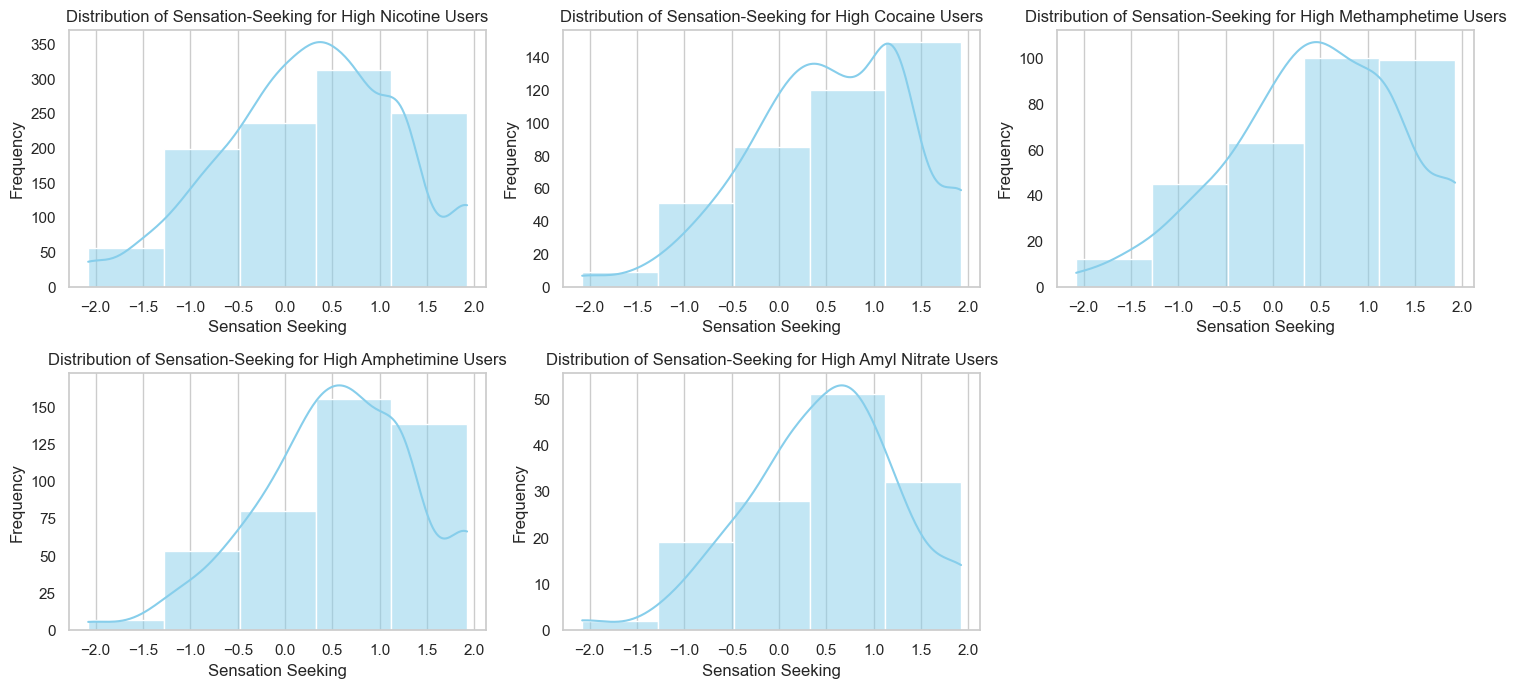

In [2]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
data_combined = pd.read_csv("numerical_targets.csv")

#nicotine
high_nicotine_users = data_combined[data_combined['nicotine'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 1)
sns.histplot(high_nicotine_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Nicotine Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

#cocaine
high_cocaine_users = data_combined[data_combined['coke'].isin([3,4,5,6])]
plt.subplot(3, 3, 2)
sns.histplot(high_cocaine_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Cocaine Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

#methamphetime
high_methamphetime_users = data_combined[data_combined['meth'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 3)
sns.histplot(high_methamphetime_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Methamphetime Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

#amphetimine
high_amphetimine_users = data_combined[data_combined['amphet'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 4)
sns.histplot(high_amphetimine_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Amphetimine Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

#amyl nitrate
high_amyl_users = data_combined[data_combined['amyl'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 5)
sns.histplot(high_amyl_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Amyl Nitrate Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

##### Sensation-Seeking vs No Stimulant Drug Use

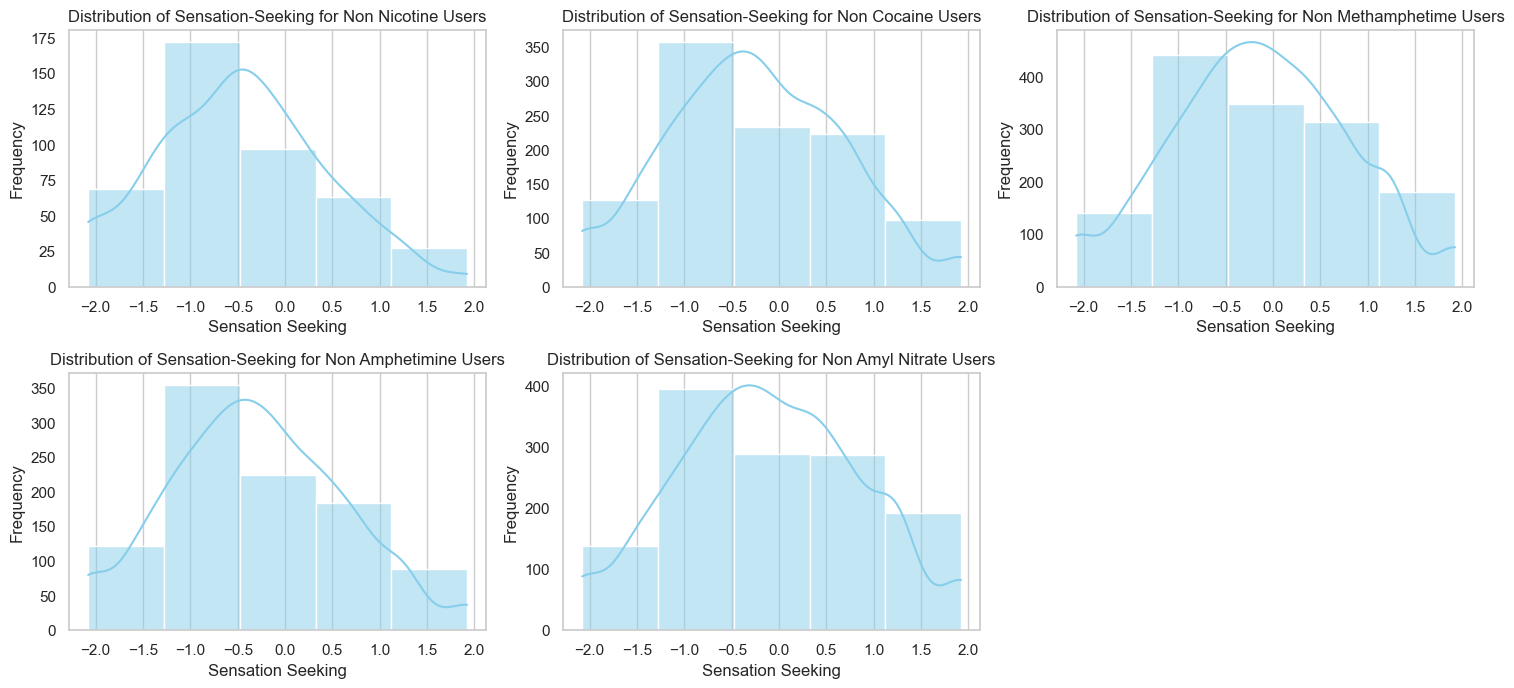

In [3]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
#nicotine
non_nicotine_users = data_combined[data_combined['nicotine'].isin([0])]
plt.subplot(3, 3, 1)
sns.histplot(non_nicotine_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for Non Nicotine Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

#cocaine
non_cocaine_users = data_combined[data_combined['coke'].isin([0])]
plt.subplot(3, 3, 2)
sns.histplot(non_cocaine_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for Non Cocaine Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

#methamphetime
non_methamphetime_users = data_combined[data_combined['meth'].isin([0])]
plt.subplot(3, 3, 3)
sns.histplot(non_methamphetime_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for Non Methamphetime Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

#amphetimine
non_amphetimine_users = data_combined[data_combined['amphet'].isin([0])]
plt.subplot(3, 3, 4)
sns.histplot(non_amphetimine_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for Non Amphetimine Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

#amyl nitrate
non_amyl_users = data_combined[data_combined['amyl'].isin([0])]
plt.subplot(3, 3, 5)
sns.histplot(non_amyl_users['sensation-seeking'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Sensation-Seeking for Non Amyl Nitrate Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

##### Comparing Sensation-Seeking distributions: 

From the data displayed in the distribtions, we see that individuals who are users of various stimulants have higher sensation-seeking levels than individuals who are non-users. This is evident in the general rightward skew in the distributions of users versus the more normal distributions of non-users. For this reason, we decided to further our analysis of sensation-seeking with stimulant drug users.

#### Neuroticism and Conscientiousness for high users of extreme drugs
Next, we decided to explore the relationship between neuroticism and conscientiousness for high users of extreme drugs. We classified what is considered an extreme drug based on drugs that were the [most dangerous and caused the most overdoses a year](https://delamere.com/blog/top-10-most-dangerous-drugs).

#### Neuroticism
We compared distributions of neuroticism for high users in each given extreme drug. It is evident that they are skewed distributions, which represent higher neuroticism scores correlated with higher extreme drug use. 

##### Neuroticism vs Extreme Drug Use

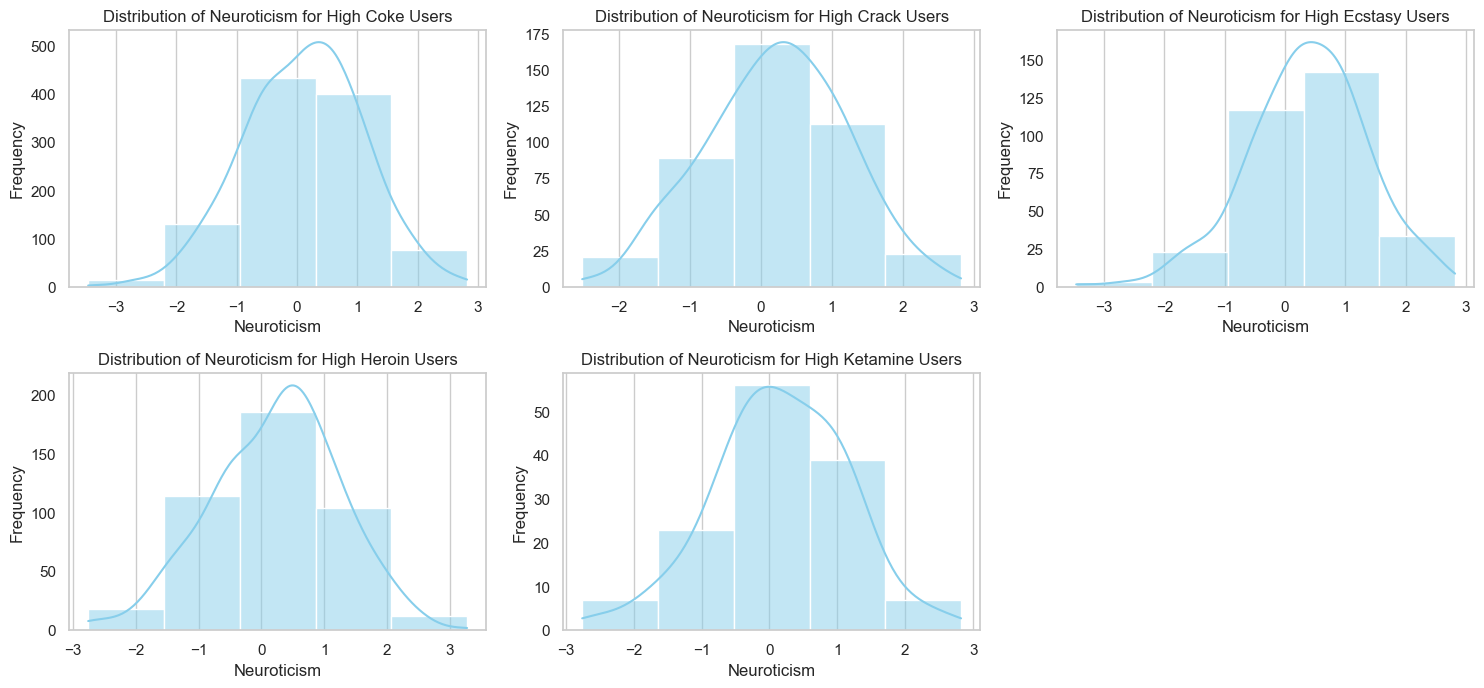

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
data_combined = pd.read_csv("numerical_targets.csv")

#coke
high_coke_users = data_combined[data_combined['coke'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 1)
sns.histplot(high_nicotine_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for High Coke Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

#crack
high_crack_users = data_combined[data_combined['crack'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 2)
sns.histplot(high_cocaine_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for High Crack Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

#ecstasy
high_ecstasy_users = data_combined[data_combined['ecstasy'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 3)
sns.histplot(high_methamphetime_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for High Ecstasy Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

#heroin
high_heroin_users = data_combined[data_combined['heroin'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 4)
sns.histplot(high_amphetimine_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for High Heroin Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

#ketamine
high_ketamine_users = data_combined[data_combined['ketamine'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 5)
sns.histplot(high_amyl_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for High Ketamine Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

##### Neuroticism vs No Extreme Drug Use

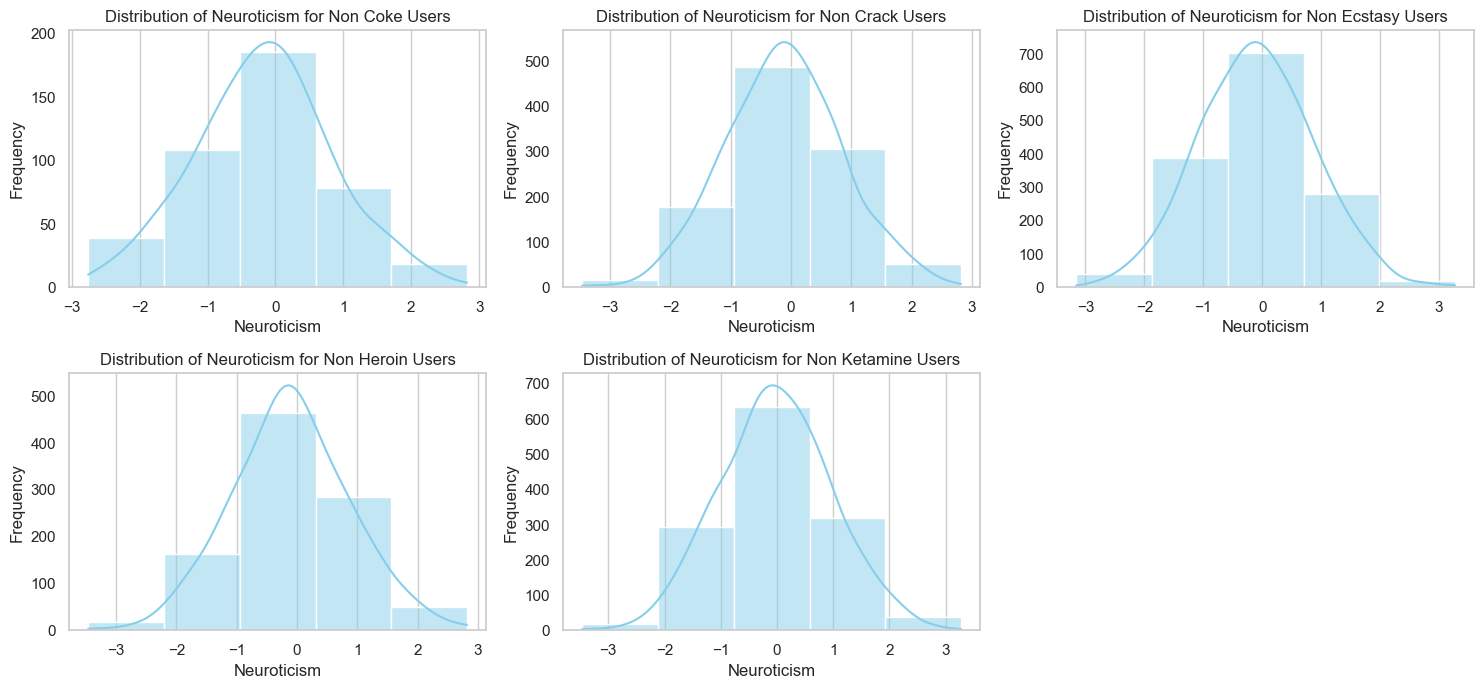

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
data_combined = pd.read_csv("numerical_targets.csv")

#coke
non_coke_users = data_combined[data_combined['coke'].isin([0])]
plt.subplot(3, 3, 1)
sns.histplot(non_nicotine_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for Non Coke Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

#crack
non_crack_users = data_combined[data_combined['crack'].isin([0])]
plt.subplot(3, 3, 2)
sns.histplot(non_cocaine_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for Non Crack Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

#ecstasy
non_ecstasy_users = data_combined[data_combined['ecstasy'].isin([0])]
plt.subplot(3, 3, 3)
sns.histplot(non_methamphetime_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for Non Ecstasy Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

#heroin
non_heroin_users = data_combined[data_combined['heroin'].isin([0])]
plt.subplot(3, 3, 4)
sns.histplot(non_amphetimine_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for Non Heroin Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

#ketamine
non_ketamine_users = data_combined[data_combined['ketamine'].isin([0])]
plt.subplot(3, 3, 5)
sns.histplot(non_amyl_users['neuroticism'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Neuroticism for Non Ketamine Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

##### Comparing Neuroticism distributions: 

From the data displayed in the distribtions, we see that individuals who are users of various stimulants have slightly higher neuroticism levels than individuals who are non-users. Altough this difference is not as prominent as in the sensation-seeking distirbutions, we thought it was valuable to further explore if this trend was revelant. For this reason, we proceeded with our analysis of neuroticism with extreme drug users.

#### Conscientiousness
Next, we compared distributions of conscientiousness for high users in each given extreme drug. It is evident that they are skewed distributions, which represent higher conscientiousness scores correlated with higher extreme drug use. 

##### Conscientiousness vs Extreme Drug Use

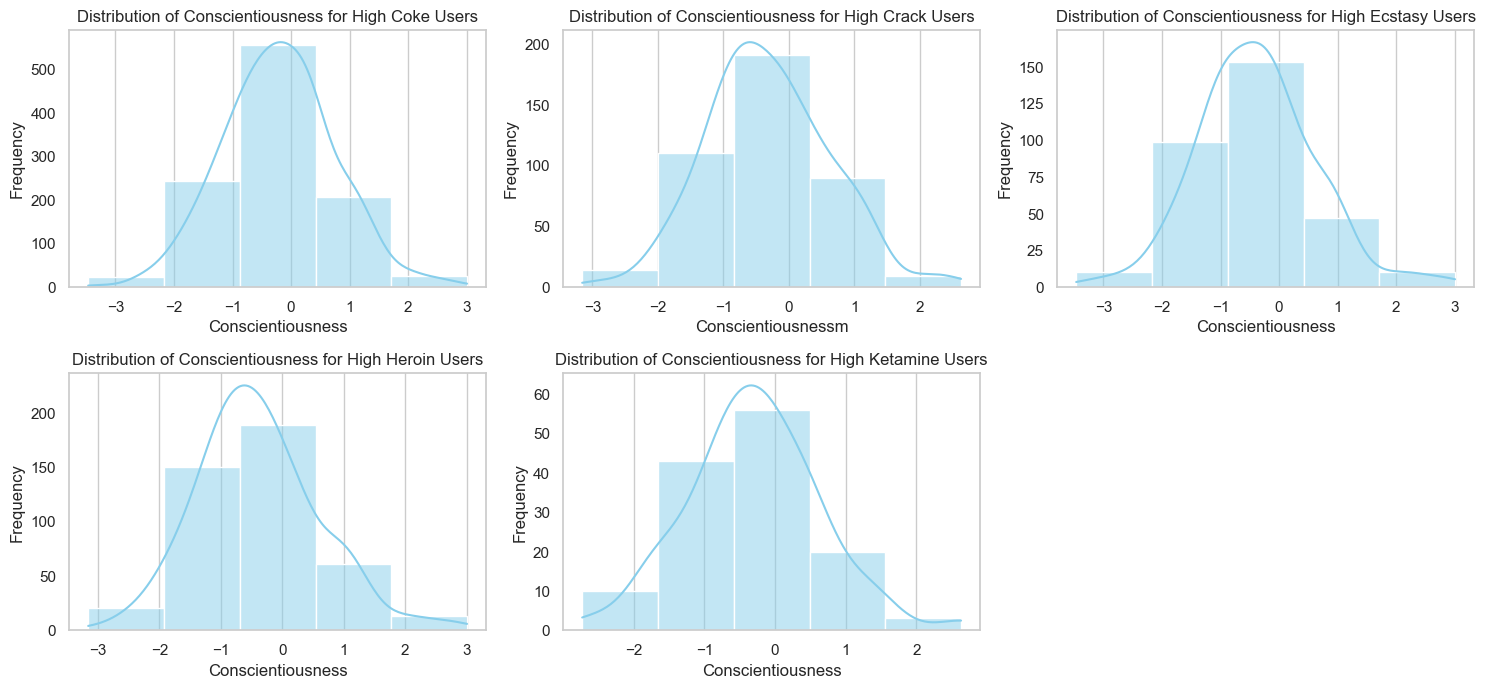

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
data_combined = pd.read_csv("numerical_targets.csv")

#coke
high_coke_users = data_combined[data_combined['coke'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 1)
sns.histplot(high_nicotine_users['conscientiousness'], bins=5, 
             kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Coke Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

#crack
high_crack_users = data_combined[data_combined['crack'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 2)
sns.histplot(high_cocaine_users['conscientiousness'], bins=5,
             kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Crack Users")
plt.xlabel("Conscientiousnessm")
plt.ylabel("Frequency")
plt.grid(axis='y')

#ecstasy
high_ecstasy_users = data_combined[data_combined['ecstasy'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 3)
sns.histplot(high_methamphetime_users['conscientiousness'], bins=5,
             kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Ecstasy Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

#heroin
high_heroin_users = data_combined[data_combined['heroin'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 4)
sns.histplot(high_amphetimine_users['conscientiousness'], bins=5,
             kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Heroin Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

#ketamine
high_ketamine_users = data_combined[data_combined['ketamine'].isin(
    [3,4,5,6])]
plt.subplot(3, 3, 5)
sns.histplot(high_amyl_users['conscientiousness'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Conscientiousness for High Ketamine Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

##### Conscientiousness vs No Extreme Drug Use

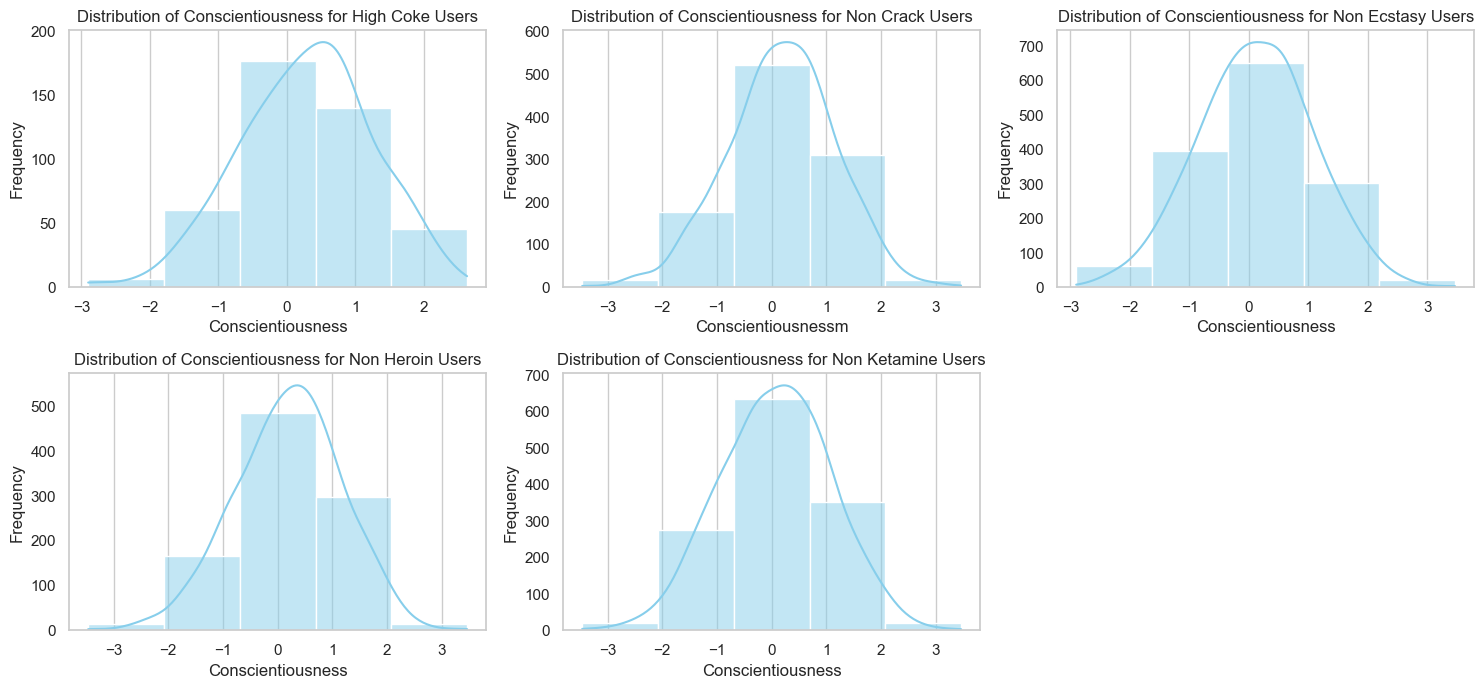

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
data_combined = pd.read_csv("numerical_targets.csv")

#coke
non_coke_users = data_combined[data_combined['coke'].isin([0])]
plt.subplot(3, 3, 1)
sns.histplot(non_nicotine_users['conscientiousness'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Conscientiousness for High Coke Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

#crack
non_crack_users = data_combined[data_combined['crack'].isin([0])]
plt.subplot(3, 3, 2)
sns.histplot(non_cocaine_users['conscientiousness'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Conscientiousness for Non Crack Users")
plt.xlabel("Conscientiousnessm")
plt.ylabel("Frequency")
plt.grid(axis='y')

#ecstasy
non_ecstasy_users = data_combined[data_combined['ecstasy'].isin([0])]
plt.subplot(3, 3, 3)
sns.histplot(non_methamphetime_users['conscientiousness'], bins=5,
             kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for Non Ecstasy Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

#heroin
non_heroin_users = data_combined[data_combined['heroin'].isin([0])]
plt.subplot(3, 3, 4)
sns.histplot(non_amphetimine_users['conscientiousness'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Conscientiousness for Non Heroin Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

#ketamine
non_ketamine_users = data_combined[data_combined['ketamine'].isin([0])]
plt.subplot(3, 3, 5)
sns.histplot(non_amyl_users['conscientiousness'], bins=5, kde=True, 
             color='skyblue')
plt.title("Distribution of Conscientiousness for Non Ketamine Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

##### Comparing Conscientiousness distributions: 

From the data displayed in the distribtions, we see that individuals who are users of various stimulants have generally lower conscientiousness levels than individuals who are non-users. Similar to our reasoning for the other two personality traits, we proceeded with our analysis of conscientiousness with extreme drug users to see if this observation was relevant. 

#### EDA Conclusion

Overall, we noticed that these three personality traits(sensation-seeking, neuroticism, and conscientiouness) showed variance in their distribution of scores between users and non-users of multiple drugs in comparison to other traits explored in Phase II. We decided to explore this relationship further in our analysis below.

## Part 3: Preregistration Statement

#### Hypothesis 1: 
Users who have higher sensation-seeking scores are more likely to be high users of stimulants.

Analysis: Run a logistic regression where our output variable is the binary variable representing the odds of being a heavy user of drugs classified as stimulants, and the input is a user’s sensation-seeking score. We aim to test whether there is a significant positive relationship between sensation-seeking and stimulant drug use, such that higher scores on sensation-seeking are associated with higher odds of being a heavy user of stimulant drugs. Specifically, we will test whether the coefficient 𝛽 sensation-seeking>0.

Null Hypothesis: There is no significant relationship between sensation-seeking score and odds of being a stimulant user

Alternative Hypothesis: There is a significant positive relationship between sensation-seeking score and odds of being a stimulant user. [Previous studies have found that sensationin seeking is related to substance abuse. ](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-019-8087-0)[Sensation-seekers seek out experiences that give them thrills and intense experiences, such as stimulant drug use.](https://oxfordre.com/communication/display/10.1093/acrefore/9780190228613.001.0001/acrefore-9780190228613-e-661)

Importance of Results: These results will be interesting because they will allow us to see whether we can predict simulant usage based on sensation-seeking score. This could be useful in real life in helping to prevent drug overdoses by identifying high-risk users based on their sensation-seeking score.


#### Hypothesis 2: 
Users who have higher neuroticism and lower conscientiousness scores are more likely to be high users of extreme drugs.

Analysis: We will run a multivariate logistic regression model with the following predictor variables: neuroticism score and conscientiousness score. The outcome variable will be the binary indicator of heavy drug use of extreme drugs (coke, crack, heroin, ecstasy, ketamine). We will evaluate each predictor’s contribution to the odds of being a heavy user. We will test if βneuroticism > 0 (higher neuroticism is positively associated with higher odds of heavy drug use) and if βconscientiousness < 0 (lower conscientiousness is positively associated with higher odds of heavy drug use).

Null Hypothesis: There is no significant relationship between neuroticism and conscientiousness score and odds of being a user of extreme drugs

Alternative Hypothesis: There is a significant positive relationship between high neuroticism score and low conscientiousness score and odds of being a user of extreme drugs. [Previous studies have found that individuals with higher neuroticism scores are associated with higher drug use, potentially as a coping mechanism to their heightened emotions. ]() [Researchers have also found that lower conscientioussness scores are associated with drug use, becuase they have lower concern for their health and lower impulse control.](https://pmc.ncbi.nlm.nih.gov/articles/PMC9091062/#:~:text=Individuals%20low%20in%20conscientiousness%20often,Raynor%20%26%20Levine%2C%202009).)

Importance of Results: These results will be interesting because they will allow us to see if we can predict extreme drug usage based on both neuroticism and conscientiousness score. This would be useful in real life because by identifying people who are more likely to be users of extreme drugs based on these scores could help prevent drug overdoses and addictions before they happen. 


## Part 4&5: Data Analysis and Evaluation of Signficance

Read in cleaned csv file for data features:

In [8]:
features= pd.read_csv("cleaned_features.csv")
features.head()

,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation-seeking
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


Read in cleaned csv file for data targets:

In [9]:
targets= pd.read_csv("cleaned_targets.csv")
targets.head()

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,...,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa,stimulant,extreme
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0,1,...,0,0,0,1,0,1,0,0,1,1
2,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Question 1: Are users who have higher sensation-seeking scores more likely to be users of stimulants?

Hypothesis: We hypothesize that there is a positive relationship between sensation-seeking score and odds of being a stimulant user.

Null Hypothesis: There is no significant relationship between sensation-seeking score and odds of being a stimulant user.

Alternative Hypothesis: There is a significant positive relationship between sensation-seeking score and odds of being a stimulant user.

First, we decided to visualize the relationship between these two variables with a graph

The correlation between sensation-seeking score and odds of being a stimulant user is 0.231.


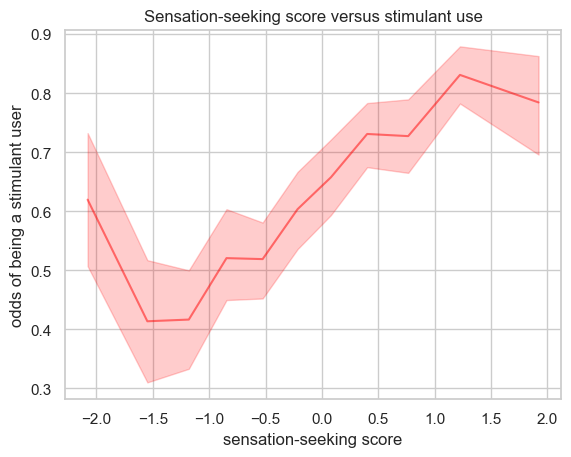

In [10]:
sns.lineplot(x= features['sensation-seeking'], y=targets[
             'stimulant'], color = 'red', alpha=0.5);
plt.title('Sensation-seeking score versus stimulant use')
plt.xlabel('sensation-seeking score')
plt.ylabel('odds of being a stimulant user')
correlation = features['sensation-seeking'].corr(targets[
                                                 'stimulant'])
print(f'The correlation between sensation-seeking score and \
odds of being a stimulant user is {correlation:.3f}.')

In [11]:
data = pd.concat([features['sensation-seeking'], targets[
                  'stimulant']], axis=1).dropna()
X = data[['sensation-seeking']]
y = data['stimulant']
X = sm.add_constant(X)  

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

beta = result.params['sensation-seeking']
p_value = result.pvalues['sensation-seeking']

Optimization terminated successfully.
         Current function value: 0.627807
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              stimulant   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1875
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.04154
Time:                        20:53:47   Log-Likelihood:                -1178.4
converged:                       True   LL-Null:                       -1229.5
Covariance Type:            nonrobust   LLR p-value:                 5.130e-24
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5997      0.050     12.037      0.000       0.502       0.697
sensatio

#### Interpretation: 
##### Summarizing:
Our model shows a positive correlation between sensation-seeking and the odds of stimulant drug use. For each one-unit increase in sensation-seeking, the log-odds of stimulant use increases by 0.5219.

##### Predictions:
This model indicates that an individual with a sensation-seeking score of 1.0, we should expect them to have 0.78 odds of being a stimulant drug user.

##### Oddities/outliers:
While the model indicates a strong relationship, the pseudo R-squared of 0.04154 suggests there may be other factors influencing stimulant use that are not captured here.

#### Evaluation of Significance 1:

The results of the t-test shows that the p-value for sensation-seeking is about 0.000, which is smaller than the 0.05 threshold. The coefficient for sensation-seeking is 0.5219. This means that we can reject the null hypothesis. There is evidence to support that there is a significiant positive relationship between sensation-seeking score and odds of being a stimulant user.

### Question 2: What is the relationship between neuroticism and conscientiousness score and use of extreme drugs?

We visualized the relationship between both neuroticism and conscientiousness score and use of extreme drugs in the graphs below:

The correlation between conscientiousness score and odds of being an extreme drug user is -0.150.


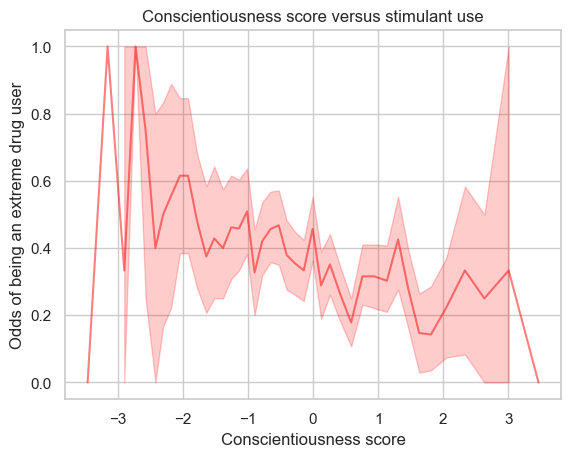

In [12]:
sns.lineplot(x= features['conscientiousness'],
             y=targets['extreme'], color = 'red', alpha=0.5);
plt.title('Conscientiousness score versus stimulant use')
plt.xlabel('Conscientiousness score')
plt.ylabel('Odds of being an extreme drug user')
correlation = features['conscientiousness'].corr(targets['extreme'])
print(f'The correlation between conscientiousness score \
and odds of being an extreme drug user is {correlation:.3f}.')

The correlation between neuroticism score and odds of being an extreme drug user is 0.093.


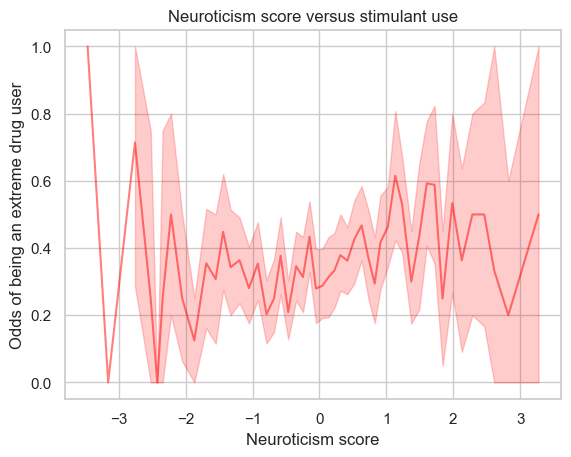

In [13]:
sns.lineplot(x= features['neuroticism'], y=targets[
             'extreme'], color = 'red', alpha=0.5);
plt.title('Neuroticism score versus stimulant use')
plt.xlabel('Neuroticism score')
plt.ylabel('Odds of being an extreme drug user')
correlation = features['neuroticism'].corr(targets['extreme'])
print(f'The correlation between neuroticism score \
and odds of being an extreme drug user is {correlation:.3f}.')

Hypothesis: We predict that users who have higher neuroticism and lower conscientiousness scores are most likely to be high users of extreme drugs.

Null Hypothesis: There is no significant relationship between neuroticism and conscientiousness score and odds of being a user of extreme drugs

Alternative Hypothesis: There is a significant positive relationship between high neuroticism score and low conscientiousness score and odds of being a user of extreme drugs

In [14]:
data = pd.concat([
    features[['neuroticism', 'conscientiousness']], 
    targets['extreme']
], axis=1).dropna()

X = data[['neuroticism', 'conscientiousness']] 
X = sm.add_constant(X)  
y = data['extreme'] 

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.639310
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                extreme   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1874
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01846
Time:                        20:53:48   Log-Likelihood:                -1200.0
converged:                       True   LL-Null:                       -1222.5
Covariance Type:            nonrobust   LLR p-value:                 1.590e-10
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6054      0.049    -12.363      0.000      -0.701      -0.509
neurotic

#### Interpretation:
##### Summarizing:
Our model shows a negative correlation between conscientiousness and the odds of being an extreme drug user. Each additional unit of conscientiousness decreases the odds by approximately 25%. However, neuroticism does not show a statistically significant relationship with extreme drug use, as indicated by its p-value of 0.115.

##### Predictions:
This model indicates that at a conscientiousness score of 2, the odds of being an extreme drug user are approximately 0.2. At a neuroticism score of 2, the odds of being an extreme drug user are approximately 0.55.

##### Oddities/outliers:
The graph of neuroticism versus the odds of being an extreme drug user exhibits irregular fluctuations, with the standard error being wide and variable in many areas. This suggests that there may be noise or outliers in the data, making it difficult to establish a clear and consistent relationship between neuroticism and extreme drug use. The graph of concientiousness versus the odds of being an extreme drug user displays a similar relationship, with the standard error getting larger as the concientiousness scores increase away from zero in both the positive and negative direction. 

#### Evaluation of Significance 2:

The results of the t-test shows that the p-value for conscientiousness is about 0.000, which is smaller than the 0.05 threshold. The coefficient for conscientiousness is -0.2883. This means that we can reject the part of the null hypothesis regarding conscientiousness score. There is evidence to support that there is a signficiant negative relationship between conscientiousness score and odds of being a extreme drug user. The results of the t-test shows that the p-value for neuroticism is about 0.115, which is not smaller than the 0.05 threshold. The coefficient for neuroticism is very close to 0 at 0.0839. This means that we cannot reject the part of the null hypothesis that there is no significant relationship between neuroticism score and the odds of being a user of extreme drugs.

## Part 6: Conclusions

Our analyses explored the relationship between personality traits and drug use, focusing on whether certain traits can reliably predict an individual's likelihood of using specific substances. In the first analysis, we examined the relationship between sensation-seeking and stimulant drug use. The results indicated a significant positive correlation, suggesting that individuals with higher sensation-seeking scores are more likely to engage in stimulant drug use. This finding supports the hypothesis that sensation-seeking behavior drives individuals toward substances that provide heightened stimulation or excitement, such as stimulants.

In the second analysis, we investigated the roles of neuroticism and conscientiousness in predicting use of extreme drugs, including cocaine, crack, heroin, ecstasy, and ketamine. The results revealed that low conscientiousness was significantly associated with increased odds of heavy drug use, aligning with the hypothesis that reduced impulse control and responsibility increase vulnerability to risky behaviors. However, while the coefficient for neuroticism was positive, its p-value exceeded the threshold for statistical significance. This indicates that the relationship between neuroticism and extreme drug use is not strong enough to be conclusive in this dataset.

##### Research Questions: 
1. Can we reliably predict a person's drug use based off a person's personality traits?
2. What types of drugs are more likely to be used by certain personalities?
   
Returning to our research questions, these findings suggest that certain personality traits, particularly sensation-seeking and conscientiousness, can reliably predict specific types of drug use. Stimulant drug use is signficiantly linked to high sensation-seeking scores, and use of extreme drugs is significantly associated with low conscientiousness. However, to relate to the second question, the role of neuroticism remains inconclusive, requiring further research to clarify its impact on extreme drug use. To further explore the second research question, we could extend our analyses to exlpore certain personality traits (neuroticism and concientiousness) versus usage of other types of drugs (e.g. depressants, ​hallucinogens, etc). But, we decided to focus our analyses on stiumlants in particular to limit complications and keep our exploration concise. 

These results contribute to our understanding of how personality traits influence substance use behaviors, offering valuable insights for prevention and intervention strategies. By identifying traits most strongly associated with specific types of drug use, specifically sensation-seeking and conscientiousness, out work highlights the potential of personality-based assessments in identifying individuals at higher risk, ultimately supporting efforts to mitigate the dangers of substance abuse.

## Part 7: Limitations

There were a few limitations we discovered in the data. First, there was bias in the data. In this article about the data, *https://arxiv.org/abs/1506.06297*, the biases described were as follows: the sample was highly educated and all native english speaking. The largest bias of the data was that its respondants were 91.2% white. This could affect how representative and accurate the data and results are of the general population, especially any racial category besides white, as well as less educated and non-native speakers. This could have serious effects, as drug usage predicitions might be less accurate for these people, causing high-risk users to not be identified, leading to moverdoses that could have been prevented. Also, the data for the targets about the drug use was seperated into classes that described the last time the respondants had used the drug. This was difficult to quanitify and represent as numbers, and we may have not chosen the most accurate way to represent the drug use of the responders. Our decision to convert to binary could also may have led to loss of information and specificity because we grouped all drug users together, and established our own cut off for non-drug users. But, within the drug user class, there is fluctuations in frequency of use, which we eliminated due to our conversion to binary. This could also affect our results because it separates users into two distinct categories, (0 and 1), which might mean that our predictions loses some credibility in its predictions for people who lay close to the boundary of these two categories, which might let people who could potentially be users slip through the cracks of our predictions, leading to overdoses that could have been prevented.

## Part 8: Acknowledgements and Bibliography
#### Sources:
- Cherry, Kendra. “The Big Five Personality Dimensions.” Verywell Mind, 11 Mar 2023, https://www.verywellmind.com/the-big-five-personality-dimensions-2795422#:~:text=Extraversion%20is%20sociability%2C%20agreeableness%20is,involves%20sadness%20or%20emotional%20instability
- Dash, Genevieve F et al. “Big Five personality traits and illicit drug use: Specificity in trait-drug associations.” Psychology of addictive behaviors : journal of the Society of Psychologists in Addictive Behaviors vol. 37,2 (2023): 318-330. doi:10.1037/adb0000793
- Harrington, Nancy Grant. "Sensation Seeking." Oxford Research Encyclopedia of Communication.  May 24, 2017. Oxford University Press. Date of access 8 Dec. 2024, https://oxfordre.com/communication/view/10.1093/acrefore/9780190228613.001.0001/acrefore-9780190228613-e-661
- Jamt, R.E.G., Gjerde, H., Furuhaugen, H. et al. "Associations between psychoactive substance use and sensation seeking behavior among drivers in Norway." BMC Public Health, 08 Jan. 2020. https://doi.org/10.1186/s12889-019-8087-0
- McCrae, R R, and O P John. “An introduction to the five-factor model and its applications.” Journal of personality vol. 60,2 (1992): 175-215. doi:10.1111/j.1467-6494.1992.tb00970.x
- “Personality Traits Related to Drug Use.” Fort Behavioral Health, 27 Nov. 2019, https://fortbehavioral.com/addiction-recovery-blog/personality-traits-related-to-drug-use/#:~:text=Although%20a%20person's%20environment%20is,and%20therefore%20substance%20use%20disorders
- “Stimulants.” Cal Poly Pomona Health Center, https://www.cpp.edu/health/health-topics/stimulants.shtml
- “Sensation-Seeking.” Psychology Today, https://www.psychologytoday.com/us/basics/sensation-seeking
- Preston, Martin. “Top 10 Most Dangerous Drugs.” Delamere, 3 Feb. 2022, delamere.com/blog/top-10-most-dangerous-drugs
##### Data cleaning sources
- “Applying Lambda Functions to Pandas DataFrame.” GeeksforGeeks, 9 Aug. 2024, https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
- “pandas.DataFrame.any.” Pandas Documentation, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html
- “pandas.DataFrame.apply.” Pandas Documentation, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
- “pandas.DataFrame.to_csv.” Pandas Documentation, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
- “seaborn.set.” Seaborn Documentation, https://seaborn.pydata.org/generated/seaborn.set.html